#Laptop Price Prediction

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path='Dataset.csv'
df=pd.read_csv(path,encoding='latin-1')

##Data Health Review

In [6]:
df.sample(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1252,1270,Lenovo,IdeaPad 310-15ISK,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6100U 2.3GHz,6GB,128GB SSD,Nvidia GeForce 920MX,Windows 10,2.4kg,569.0
1189,1207,Acer,Predator G9-793,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.2kg,2599.0
59,60,Asus,X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux),Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,Intel HD Graphics 520,Linux,2kg,415.0
368,374,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R7 M445,Windows 10,2.33kg,899.0
1213,1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg,999.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [8]:
# Checking percentage of missing values
(df.isnull().mean()*100).sort_values(ascending = False)

laptop_ID           0.0
Company             0.0
Product             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price_euros         0.0
dtype: float64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [11]:
df.drop(columns=['laptop_ID','Product'],inplace=True)

## Data Analysis & Feature Engineering

####Analysis by RAM

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


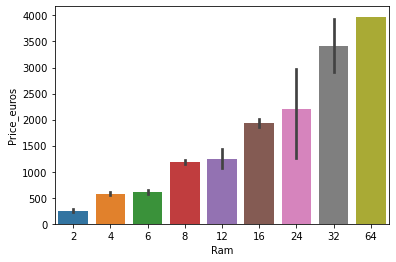

In [12]:
# Extract the numeric values from the Ram column using regular expressions
df['Ram'] = df['Ram'].str.extract('(\d+)').astype(int)

sns.barplot(df['Ram'], df['Price_euros'])
plt.show()


In [13]:
df['Ram'].describe()

count    1303.000000
mean        8.382195
std         5.084665
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        64.000000
Name: Ram, dtype: float64

####Analysis by Weight

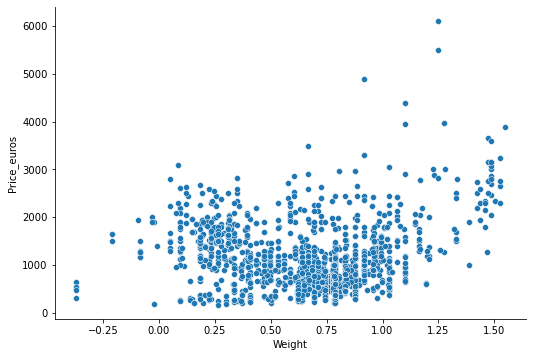

In [14]:
# Extract the numeric values from the Weight column using regular expressions
pattern = r'\d+\.?\d*|\.\d+'

df['Weight'] = df['Weight'].str.extract('(\d+(?:\.\d+)?)').astype(float)

df['Weight'] = np.log(df['Weight'])

sns.pairplot(df, x_vars=['Weight'], y_vars=['Price_euros'], kind='scatter',height=5,aspect=1.5)
plt.show()

####Analysis by Screen Resolution

In [15]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

<AxesSubplot:xlabel='Touchscreen', ylabel='Price_euros'>

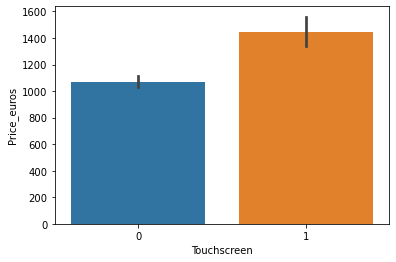

In [16]:
#how many laptops in data are touchscreen
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])

<AxesSubplot:xlabel='Ips', ylabel='Price_euros'>

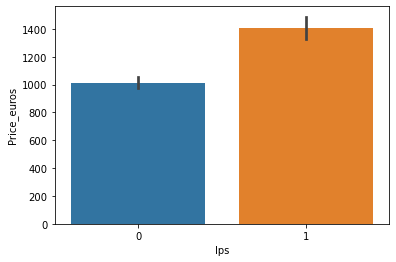

In [17]:
#extract IPS column
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
sns.barplot(x=df['Ips'],y=df['Price_euros'])

In [18]:
def findXresolution(s):
  return s.split()[-1].split("x")[0]
def findYresolution(s):
  return s.split()[-1].split("x")[1]

#finding the x_res and y_res from screen resolution
df['X_res'] = df['ScreenResolution'].apply(lambda x: findXresolution(x))
df['Y_res'] = df['ScreenResolution'].apply(lambda y: findYresolution(y))

#convert to numeric
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

#Replacing inches, X and Y resolution to PPI
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.corr()['Price_euros'].sort_values(ascending=False)
df.drop(columns = ['ScreenResolution', 'Inches','X_res','Y_res'], inplace=True)



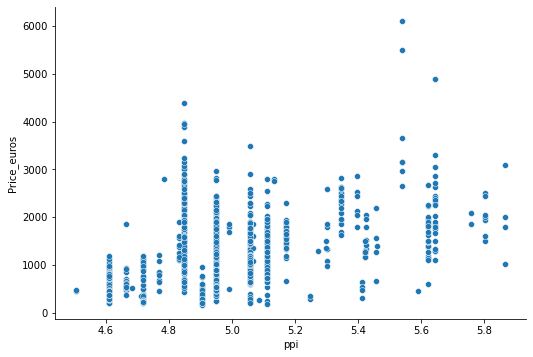

In [19]:
df['ppi']=np.log(df['ppi'])
sns.pairplot(df, x_vars=['ppi'], y_vars=['Price_euros'], kind='scatter',height=5,aspect=1.5)

####Analysis by Processor brand

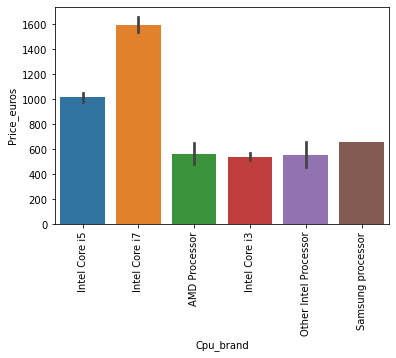

In [20]:
def fetch_processor(x):
  cpu_name = " ".join(x.split()[0:3])
  if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
    return cpu_name
  elif cpu_name.split()[0] == 'Intel':
    return 'Other Intel Processor'
  elif cpu_name.split()[0] == 'AMD':
      return 'AMD Processor'
  else:
    return 'Samsung processor'

df['Cpu_brand'] = df['Cpu'].apply(lambda x: fetch_processor(x))

sns.barplot(x=df['Cpu_brand'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()
df.drop(columns=['Cpu'],inplace=True)

####Analysis by Memory

In [21]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

/var/folders/t3/5wzkvh2s6rx6pz0mjnc1zp700000gn/T/ipykernel_7580/4023190604.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
/var/folders/t3/5wzkvh2s6rx6pz0mjnc1zp700000gn/T/ipykernel_7580/4023190604.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [22]:
df.drop(columns=['Memory','Hybrid','Flash_Storage'],inplace=True)

In [23]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD
1142,HP,2 in 1 Convertible,8,Intel HD Graphics 520,Windows 10,0.392042,1629.00,1,0,5.109769,Intel Core i5,0,256
975,HP,Notebook,8,Nvidia GeForce 930MX,Windows 10,0.712950,979.00,0,1,4.950262,Intel Core i5,1000,128
38,HP,Notebook,4,Intel HD Graphics 620,Windows 10,0.620576,488.69,0,0,4.609707,Intel Core i5,1000,0
284,Acer,Notebook,8,Nvidia GeForce MX150,Windows 10,1.098612,951.00,0,1,4.950262,Intel Core i7,0,256
1028,Dell,Ultrabook,8,Intel HD Graphics 620,Windows 10,0.254642,1624.00,1,0,5.620595,Intel Core i5,0,256


####Analysis by Gpu

In [24]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


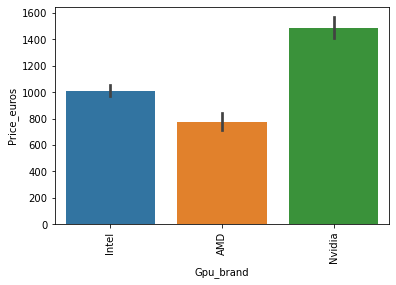

In [25]:
# Which brand GPU is in laptop
df['Gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])
#there is only 1 row of ARM GPU so remove it
df = df[df['Gpu_brand'] != 'ARM']
df.drop(columns=['Gpu'],inplace=True)

sns.barplot(x=df['Gpu_brand'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

#### Analysis by Company

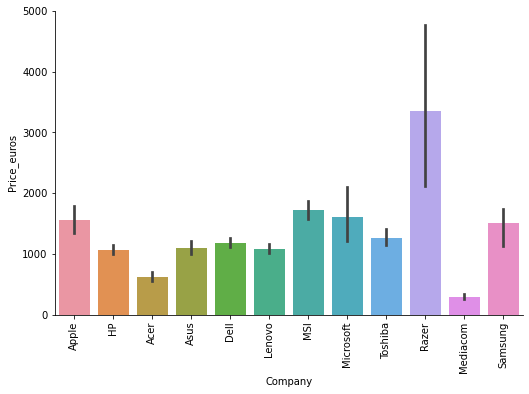

In [26]:
counts = df['Company'].value_counts()
mask = counts < 5
to_remove = counts[mask].index.tolist()
df = df[~df['Company'].isin(to_remove)]
sns.catplot(x='Company', y='Price_euros', kind='bar', data=df,height=5,aspect=1.5).set_xticklabels(rotation=90)

####Analysis by Typename & OpSys

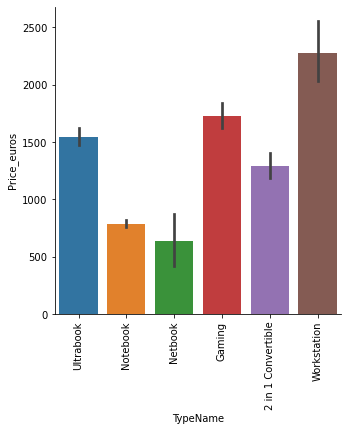

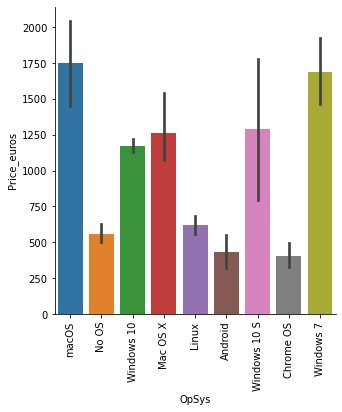

In [27]:
sns.catplot(x='TypeName', y='Price_euros', kind='bar', data=df).set_xticklabels(rotation=90)
sns.catplot(x='OpSys', y='Price_euros', kind='bar', data=df).set_xticklabels(rotation=90)

plt.show()


#### Summary of Data Analysis

As our primary motive is to train, test and predict the price of the laptops based on this dataset,a comprehensive Analysis of the various variables of the dataset are done against the Price data.

These are the changes made in order to make the analysis more efficient and effective:



1. The Data in **Ram & Weight** variables were made numerical by removing their respective units
2. The **ScreenResolution** Varaible has been split into 3 variables- **Tourchscreen, Ips & ppi(resolution) **
3. **Cpu & Gpu** variables were used to get **Cpu_brand & Gpu_brand** variables
4. The **Memory** Variable were used to get various information and finally made into two variables- **SSD & HDD**, containing the size of the memory in each respectively.
5. The variable **Company** had **more unique values** and few of those were made very few observations in the dataset, as removing such least observed company data help us to reduce the overfitting while performing the Linear regression through encoding, we have removed company data that had less than 5 observations
6. Later, the variables - **Memory, Cpu, Gpu, ScreenResolution** were removed,while the variables **Laptop ID & Product** were removed as they had least use for the model building.
7. The distribution of data of variable **Weight is normalised** using log function to have a better distribution of the data.


In [28]:
categorical = [col for col in df.columns if df[col].dtypes == 'O']
print('The Categorical variables are : \n ', categorical)

The Categorical variables are : 
  ['Company', 'TypeName', 'OpSys', 'Cpu_brand', 'Gpu_brand']


In [29]:
Numerical = [col for col in df.columns if (df[col].dtypes == 'int64') or (df[col].dtypes == 'float64') ]
print('The Numerical variables are : \n ', Numerical)

The Numerical variables are : 
  ['Ram', 'Weight', 'Price_euros', 'Touchscreen', 'Ips', 'ppi', 'HDD', 'SSD']


In [30]:
df.sample(3)

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand
1016,HP,Notebook,4,Windows 10,0.712950,769.99,0,0,4.609707,Intel Core i3,0,256,Intel
828,Acer,Netbook,4,Chrome OS,0.300105,355.00,0,1,4.905972,Other Intel Processor,0,0,Intel
739,Acer,Notebook,4,Windows 10,0.875469,410.80,0,0,4.609707,Intel Core i3,500,0,Intel


##Model Building

####Correlation & VIF

                  Ram    Weight  Price_euros  Touchscreen       Ips       ppi  \
Ram          1.000000  0.294918     0.742757     0.113817  0.208144  0.323767   
Weight       0.294918  1.000000     0.105604    -0.333076 -0.036143 -0.410490   
Price_euros  0.742757  0.105604     1.000000     0.185204  0.252234  0.504313   
Touchscreen  0.113817 -0.333076     0.185204     1.000000  0.152308  0.440306   
Ips          0.208144 -0.036143     0.252234     0.152308  1.000000  0.329657   
ppi          0.323767 -0.410490     0.504313     0.440306  0.329657  1.000000   
HDD          0.094914  0.538072    -0.099262    -0.208788 -0.087500 -0.323183   
SSD          0.603664 -0.122717     0.667067     0.252600  0.219931  0.542120   

                  HDD       SSD  
Ram          0.094914  0.603664  
Weight       0.538072 -0.122717  
Price_euros -0.099262  0.667067  
Touchscreen -0.208788  0.252600  
Ips         -0.087500  0.219931  
ppi         -0.323183  0.542120  
HDD          1.000000 -0.403083 

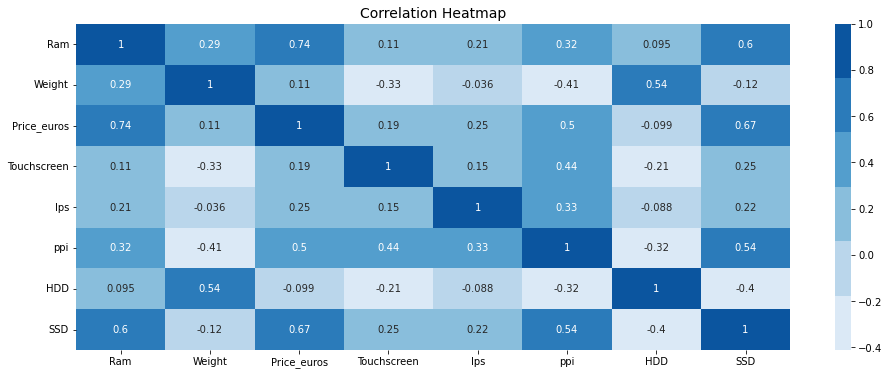

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

corr = df.corr()
print(corr)

plt.figure(figsize=(16, 6))
colormap = sns.color_palette("Blues")
sns.heatmap(df.corr(), annot=True, cmap=colormap).set_title('Correlation Heatmap', fontdict={'fontsize':14})
plt.show()

In [32]:
X=df[[col for col in df.columns if (df[col].dtypes == 'int64') or (df[col].dtypes == 'float64') ]]
# calculate the VIF for each variable
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# display the VIF values
print(vif)


      features        VIF
0          Ram  11.151382
1       Weight   9.011636
2  Price_euros   9.899454
3  Touchscreen   1.442895
4          Ips   1.507267
5          ppi   8.515741
6          HDD   3.044713
7          SSD   5.355570


In [33]:
import statsmodels.api as sm

X = df[['Ram', 'Weight', 'Price_euros', 'Touchscreen', 'Ips', 'ppi', 'SSD', 'HDD']]
y = df['Price_euros']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.632e+31
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:12:14   Log-Likelihood:                 32553.
No. Observations:                1280   AIC:                        -6.509e+04
Df Residuals:                    1271   BIC:                        -6.504e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.274e-13   1.81e-12     -0.126      

In [34]:
X=X.drop(columns=['Ram','Weight','Price_euros','const'])
# calculate the VIF for each variable
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# display the VIF values
print(vif)


      features       VIF
0  Touchscreen  1.293776
1          Ips  1.477541
2          ppi  4.177696
3          SSD  2.623925
4          HDD  1.985267


In [35]:
import statsmodels.api as sm

X = df[['Touchscreen', 'Ips', 'ppi', 'SSD', 'HDD']]
y = df['Price_euros']
model = sm.OLS(y, X).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Price_euros   R-squared (uncentered):                   0.861
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              1579.
Date:                Fri, 10 Mar 2023   Prob (F-statistic):                        0.00
Time:                        16:12:20   Log-Likelihood:                         -9755.9
No. Observations:                1280   AIC:                                  1.952e+04
Df Residuals:                    1275   BIC:                                  1.955e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

##Models

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [37]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,0.314811,1339.69,0,1,5.424875,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,0.292670,898.94,0,0,4.849511,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,0.620576,575.00,0,0,4.950262,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,0.604316,2537.45,0,1,5.396055,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,0.314811,1803.60,0,1,5.424875,Intel Core i5,0,256,Intel


###Simple Linear Regression

####Model 1: Vs Company

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# define the predictor variable and response variable
X = df[['Company']]
y = df['Price_euros']

# one-hot encode the categorical variable
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],remainder='passthrough')
X = ct.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=3)

# train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# make predictions on the test data
y_pred = regressor.predict(X_test)

accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison={}
model_comparison['SLR Vs Company']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

R2 Score : 13.12%
MAE : 46534.08%
MSE : 36805015.12%
Cross Val Accuracy: 11.57 %


####Model 2: Vs Ram

In [39]:
# Define the predictor variable and response variable
X = df['Ram']
y = df['Price_euros']

# Add a constant term to the predictor variable to fit an intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=3)

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import r2_score
y_pred = model.predict(X_test)

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['SLR Vs Ram']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     1573.
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          6.88e-225
Time:                        16:12:28   Log-Likelihood:                -9686.5
No. Observations:                1280   AIC:                         1.938e+04
Df Residuals:                    1278   BIC:                         1.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        270.6929     25.223     10.732      0.0

####Model 3: Vs ppi

In [40]:
# Define the predictor variable and response variable
X = df['ppi']
y = df['Price_euros']

# Add a constant term to the predictor variable to fit an intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=3)

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import r2_score
y_pred = model.predict(X_test)

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['SLR Vs ppi']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     435.9
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           1.59e-83
Time:                        16:12:29   Log-Likelihood:                -10012.
No. Observations:                1280   AIC:                         2.003e+04
Df Residuals:                    1278   BIC:                         2.004e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5827.2757    333.450    -17.476      0.0

####Model 4: Vs Weight

In [41]:
# Define the predictor variable and response variable
X = df['Weight']
y = df['Price_euros']

# Add a constant term to the predictor variable to fit an intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=3)

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import r2_score
y_pred = model.predict(X_test)

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['SLR Vs Weight']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     14.41
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           0.000154
Time:                        16:12:31   Log-Likelihood:                -10193.
No. Observations:                1280   AIC:                         2.039e+04
Df Residuals:                    1278   BIC:                         2.040e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        968.6449     45.692     21.199      0.0

####Model 5: Vs HDD

In [42]:
# Define the predictor variable and response variable
X = df['HDD']
y = df['Price_euros']

# Add a constant term to the predictor variable to fit an intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=3)

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import r2_score
y_pred = model.predict(X_test)

accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)

print(f"R2 Score : {r2_score(y_test,y_pred)*100:.2f}%") 
print(f"MAE : {mean_absolute_error(y_test,y_pred)*100:.2f}%")
print(f"MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))

model_comparison['SLR Vs HDD']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),(accuracies.mean())]

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     12.72
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           0.000376
Time:                        16:12:32   Log-Likelihood:                -10194.
No. Observations:                1280   AIC:                         2.039e+04
Df Residuals:                    1278   BIC:                         2.040e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1182.0421     25.079     47.132      0.0

###Multilinear Regression

####Model 1 : with all the selected variables

In [44]:
X = df.drop(columns=['Price_euros'])
y = np.log(df['Price_euros'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=3)

ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0,1,3,8,11])
    ], remainder='passthrough')

pipe = Pipeline(steps=[
    ('preprocessor', ct),
    ('regressor', LinearRegression())
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=25).mean()

print(f"R2 Score: {r2*100:.2f}%")
print(f"MSE: {mse*100:.2f}%")
print(f"MAE: {mae*100:.2f}%")
print(f"Cross Val Accuracy: {accuracy*100:.2f}%")

model_comparison['MLR(final)'] = [r2, mse, mae, accuracy]


R2 Score: 80.70%
MSE: 6.47%
MAE: 19.65%
Cross Val Accuracy: 81.70%


#### Model 2 : Except Weight


In [45]:
X = df.drop(columns=['Price_euros','Company'])
y = np.log(df['Price_euros'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=3)
X_train

,TypeName,Ram,OpSys,Weight,Touchscreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand
345,Gaming,16,Windows 10,0.875469,0,1,4.950262,Intel Core i7,2000,256,Nvidia
560,2 in 1 Convertible,4,Windows 10,0.223144,1,1,5.246528,Other Intel Processor,0,0,Intel
203,Gaming,16,Windows 10,1.163151,0,1,4.950262,Intel Core i7,1000,512,Nvidia
897,Notebook,8,Windows 10,0.712950,0,0,4.950262,Intel Core i7,1000,0,Nvidia
625,Notebook,8,Windows 10,0.788457,0,0,4.950262,Intel Core i7,1000,0,Nvidia
...,...,...,...,...,...,...,...,...,...,...,...
805,Netbook,8,Windows 10,0.231112,0,0,4.831249,Intel Core i5,0,256,Intel
262,Notebook,4,Windows 10,0.741937,0,1,4.950262,Intel Core i5,500,0,Intel
988,Notebook,8,Windows 10,0.858662,0,0,4.609707,Intel Core i7,1000,0,AMD
971,Ultrabook,8,Windows 10,0.405465,1,0,5.346158,Intel Core i7,0,256,Intel


In [46]:
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0,2,7,10])
    ], remainder='passthrough')

pipe = Pipeline(steps=[
    ('preprocessor', ct),
    ('regressor', LinearRegression())
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=25).mean()

print(f"R2 Score: {r2*100:.2f}%")
print(f"MSE: {mse*100:.2f}%")
print(f"MAE: {mae*100:.2f}%")
print(f"Cross Val Accuracy: {accuracy*100:.2f}%")

model_comparison['MLR w/o Weight'] = [r2, mse, mae, accuracy]


R2 Score: 80.06%
MSE: 6.68%
MAE: 20.01%
Cross Val Accuracy: 80.51%


#### Model 3: Except HDD


In [49]:
X = df.drop(columns=['Price_euros','HDD'])
y = np.log(df['Price_euros'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=3)
X_train

,Company,TypeName,Ram,OpSys,Weight,Touchscreen,Ips,ppi,Cpu_brand,SSD,Gpu_brand
345,Lenovo,Gaming,16,Windows 10,0.875469,0,1,4.950262,Intel Core i7,256,Nvidia
560,Acer,2 in 1 Convertible,4,Windows 10,0.223144,1,1,5.246528,Other Intel Processor,0,Intel
203,Lenovo,Gaming,16,Windows 10,1.163151,0,1,4.950262,Intel Core i7,512,Nvidia
897,HP,Notebook,8,Windows 10,0.712950,0,0,4.950262,Intel Core i7,0,Nvidia
625,Lenovo,Notebook,8,Windows 10,0.788457,0,0,4.950262,Intel Core i7,0,Nvidia
...,...,...,...,...,...,...,...,...,...,...,...
805,HP,Netbook,8,Windows 10,0.231112,0,0,4.831249,Intel Core i5,256,Intel
262,HP,Notebook,4,Windows 10,0.741937,0,1,4.950262,Intel Core i5,0,Intel
988,Dell,Notebook,8,Windows 10,0.858662,0,0,4.609707,Intel Core i7,0,AMD
971,Dell,Ultrabook,8,Windows 10,0.405465,1,0,5.346158,Intel Core i7,256,Intel


In [50]:
ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0,1,3,8,10])
    ], remainder='passthrough')

pipe = Pipeline(steps=[
    ('preprocessor', ct),
    ('regressor', LinearRegression())
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = cross_val_score(estimator=pipe, X=X_train, y=y_train, cv=25).mean()

print(f"R2 Score: {r2*100:.2f}%")
print(f"MSE: {mse*100:.2f}%")
print(f"MAE: {mae*100:.2f}%")
print(f"Cross Val Accuracy: {accuracy*100:.2f}%")

model_comparison['MLR w/o HDD'] = [r2, mse, mae, accuracy]


R2 Score: 80.57%
MSE: 6.51%
MAE: 19.70%
Cross Val Accuracy: 81.71%


###Summary on Model Building

1. Models were built using both Simple Linear regression and Multi Linear regression as well and a comparison of those models are present in the table below. 
2. Before starting to create a model, we had been choosing the varaibles based on various factors mostly based on the Analysis section, thus making all the selected variables to be most useful to build a model. 
3. Despite the facts like the high multicollinearity of Ram and Weight against Price variable or getting a slightly higher accuracy in 3rd model of MultiLinear regression than the final model, trying to choose almost all useful and feature selected variables shall make the model more mature in certain terms and also we need to value the efforts put in to collect these useful data and try to handle and use them in the most effective and efficient ways.

In [51]:
df_model_comparison = pd.DataFrame.from_dict(model_comparison, orient='index', columns=['R2 Score', 'MSE', 'MAE', 'Cross Val Accuracy'])
df_model_comparison

,R2 Score,MSE,MAE,Cross Val Accuracy
SLR Vs Company,0.131169,368050.151243,465.340754,0.115711
SLR Vs Ram,0.490053,216021.501975,339.691391,0.557098
SLR Vs ppi,0.303464,295063.271757,405.559165,0.244633
SLR Vs Weight,0.013016,418101.559001,518.711173,0.007046
SLR Vs HDD,-0.023917,433746.972933,514.716099,0.012607
MLR(final),0.807011,0.064664,0.196529,0.816972
MLR w/o Weight,0.800556,0.066827,0.200098,0.805066
MLR w/o HDD,0.805698,0.065104,0.197033,0.817100


Train R-squared: 0.8393271865785819
Test R-squared: 0.8070111226330221
Train Adjusted R-squared: 0.8375336295915521
Test Adjusted R-squared: 0.7940733207983643
Train MAE: 0.1962705062179443
Test MAE: 0.1965289195740125
Train MSE: 0.06285662122804252
Test MSE: 0.06466408363138583
Train RMSE: 0.2507122279188682
Test RMSE: 0.2542913361311899


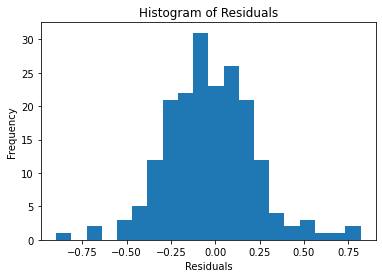

In [54]:
X = df.drop(columns=['Price_euros'])
y = np.log(df['Price_euros'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=3)

ct = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), [0,1,3,8,11])
    ], remainder='passthrough')

pipe = Pipeline(steps=[
    ('preprocessor', ct),
    ('regressor', LinearRegression())
])

pipe.fit(X_train, y_train)

# R-squared and Adjusted R-squared values
print('Train R-squared:', pipe.score(X_train, y_train))
print('Test R-squared:', pipe.score(X_test, y_test))
n = X_train.shape[0]
p = X_train.shape[1]
train_adj_r2 = 1 - (1 - pipe.score(X_train, y_train)) * (n - 1) / (n - p - 1)
print('Train Adjusted R-squared:', train_adj_r2)
n = X_test.shape[0]
p = X_test.shape[1]
test_adj_r2 = 1 - (1 - pipe.score(X_test, y_test)) * (n - 1) / (n - p - 1)
print('Test Adjusted R-squared:', test_adj_r2)

# Performance comparison on Train and Test Samples
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print('Train MAE:', mean_absolute_error(y_train, y_train_pred))
print('Test MAE:', mean_absolute_error(y_test, y_test_pred))
print('Train MSE:', mean_squared_error(y_train, y_train_pred))
print('Test MSE:', mean_squared_error(y_test, y_test_pred))
print('Train RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Test RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Histogram of residual deviance on test data
residuals = y_test - y_test_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


In [55]:
import pickle
df.to_csv("df.csv", index=False)
pickle.dump(pipe,open('pipe.pkl','wb'))

In [57]:
!pip install jedi
!pip install streamlit